In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from pylab import *


from time import perf_counter
import pandas as pd

%matplotlib qt

In [2]:
#read signal
gasforce1 = pd.read_csv('gasforce1.tab', header = None, skiprows = 1, delimiter = '\t')
speedvstime = pd.read_csv('speedvstime.tab', header = None, skiprows = 1, delimiter = '\t')

In [3]:
time_sec = np.array(gasforce1[0])
speed_rpm = np.array(speedvstime[1])

In [4]:
t1_start = time.perf_counter()

time_sec_i = time_sec[1:]
time_sec_i_1 = time_sec[:-1]
speed_rpm_i_1 = speed_rpm[:-1]
cccum2_vect_temp = (((speed_rpm_i_1/2)/60)*360*(time_sec_i-time_sec_i_1))
cccum2_vect_temp = np.insert(cccum2_vect_temp,0,0)
cccum2_vect_temp = np.cumsum(cccum2_vect_temp)
cycle_vect= np.floor(((cccum2_vect_temp/720.0))+1)
ccrel2_vect_temp = cccum2_vect_temp-(cycle_vect-1)*720
t1_end = time.perf_counter()

In [5]:
len(time_sec_i), len(time_sec_i_1), len(speed_rpm_i_1),len(cccum2_vect_temp),len(cycle_vect),len(ccrel2_vect_temp)

(164997, 164997, 164997, 164998, 164998, 164998)

In [6]:
cccum2_vect_temp

array([0.00000000e+00, 1.81831146e-01, 3.63670864e-01, ...,
       1.64996224e+05, 1.64997724e+05, 1.64999224e+05])

In [7]:
cycle_vect

array([  1.,   1.,   1., ..., 230., 230., 230.])

In [8]:
ccrel2_vect_temp

array([  0.        ,   0.18183115,   0.36367086, ..., 116.22376323,
       117.72374673, 119.22373863])

In [9]:
len(cccum2_vect_temp)

164998

In [10]:
def cccum2_loop_func(time_sec, speed_rpm):
    datalength = len(speed_rpm)
    crankanglecum = np.array([0], dtype = float64)
    cccum2_loop = np.array([0], dtype = float64)
    for i in np.arange(1, datalength):
        crankanglecum = np.append(crankanglecum,
                                  (crankanglecum[i-1]+(((speed_rpm[i-1]/2)/60)*360*(time_sec[i]-time_sec[i-1]))))
        cycle = np.array([1], dtype = int)
    crankanglerel = np.array([0], dtype = float64)
    for i in np.arange(1,datalength):
        cycle = (np.append(cycle, np.floor(((crankanglecum[i]/720.0))+1)))
        crankanglerel = np.append(crankanglerel, (crankanglecum[i]-(cycle[i]-1)*720))
    return crankanglecum, cycle,  crankanglerel

In [11]:
t2_start = time.perf_counter()
cc_loop_temp = cccum2_loop_func(time_sec, speed_rpm)
t2_end = time.perf_counter()

In [12]:
cccum2_loop = cc_loop_temp[0]
cycle_loop = cc_loop_temp[1]
ccrel2_loop = cc_loop_temp[2]

In [13]:
ccrel2_loop

array([  0.        ,   0.18183115,   0.36367086, ..., 116.22376323,
       117.72374673, 119.22373863])

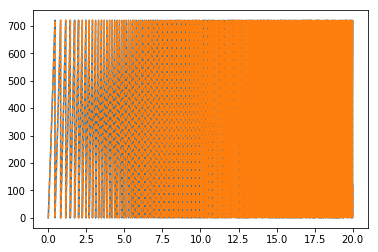

In [14]:
plt.plot(time_sec, ccrel2_vect_temp)
plt.plot(time_sec, ccrel2_loop, "--")
plt.show()

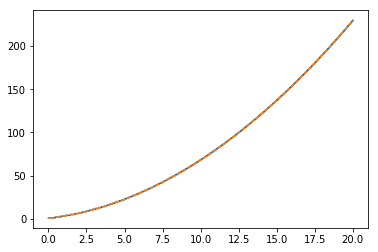

In [15]:
plt.plot(time_sec, cycle_vect)
plt.plot(time_sec, cycle_loop, "--")
plt.show()

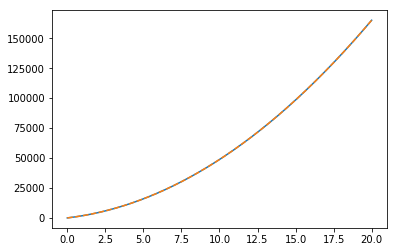

In [16]:
plt.plot(time_sec, cccum2_vect_temp)
plt.plot(time_sec, cccum2_loop, "--")
plt.show()

In [17]:
t1 = -1*(t1_start - t1_end)
t2 = -1*(t2_start - t2_end)

t1,t2

(0.022167650185096945, 310.2634768903713)